**Time Series Smoothing in Python**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
electric_ts = pd.read_csv('/content/Electric_Production.csv',header=0,index_col=0)
electric_ts.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


In [6]:
electric_ts.shape

(397, 1)

**Moving Average**

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps.
The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.
Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.
A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.
The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series

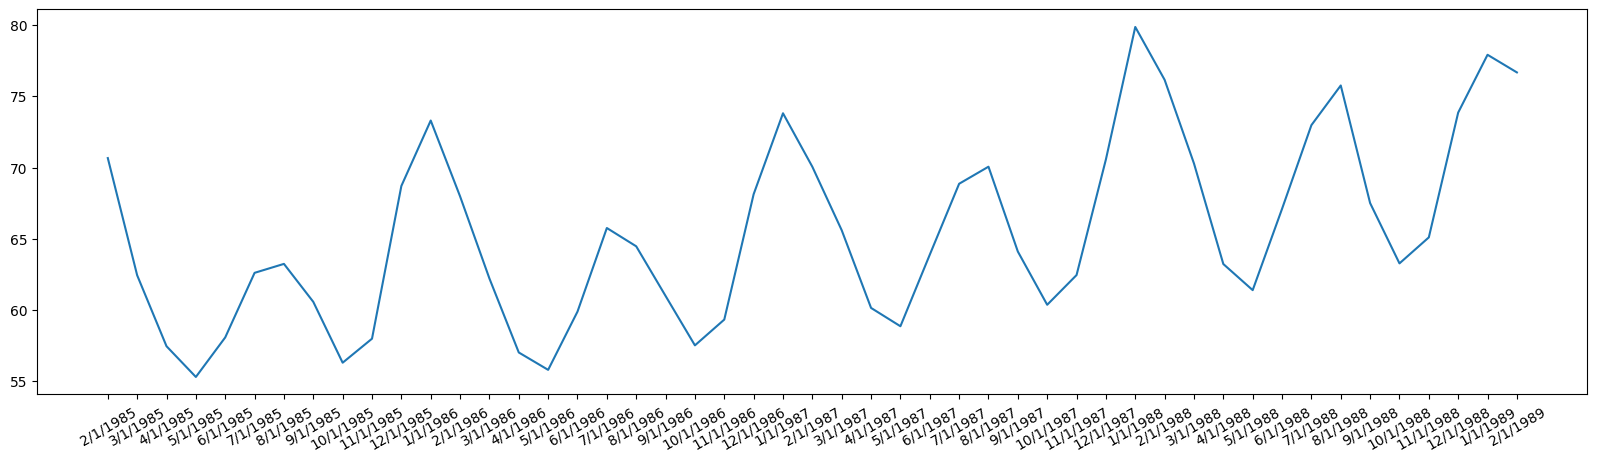

In [9]:
# Moving Average method
plt.plot(electric_ts[1:50]['IPG2211A2N'])
plt.xticks(rotation=30)
plt.show()

In [13]:
# rolling average transform
rollingseries = electric_ts[1:50].rolling(window=10)
rollingmean = rollingseries.mean()
print(rollingmean.head())

          IPG2211A2N
DATE                
2/1/1985         NaN
3/1/1985         NaN
4/1/1985         NaN
5/1/1985         NaN
6/1/1985         NaN


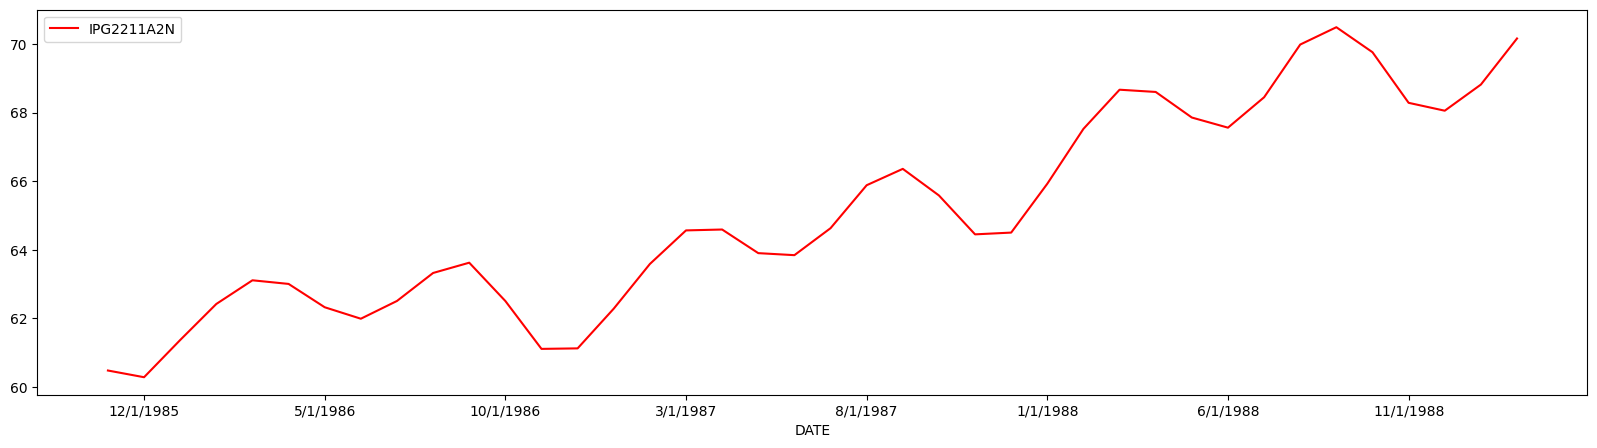

In [14]:
rollingmean.plot(color='red')
plt.show()

In [15]:
## Simple exponential smoothing

data = electric_ts[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

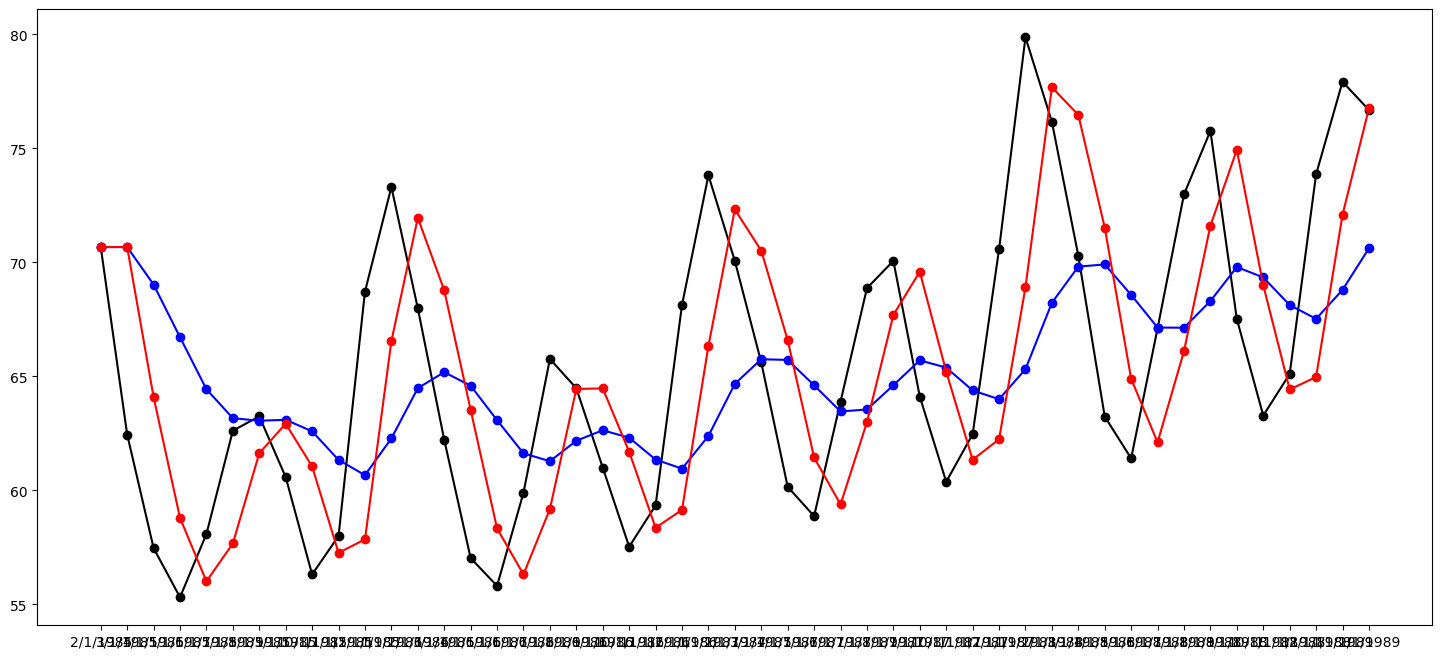

In [16]:
plt.figure(figsize=(18,8))
plt.plot(electric_ts[1:50],marker='o',color='black')

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')

In [17]:
## Holt method for exponential smoothning
fit1 = Holt(data).fit() #linear trend

fit2 = Holt(data,exponential=True).fit() #exponential trend

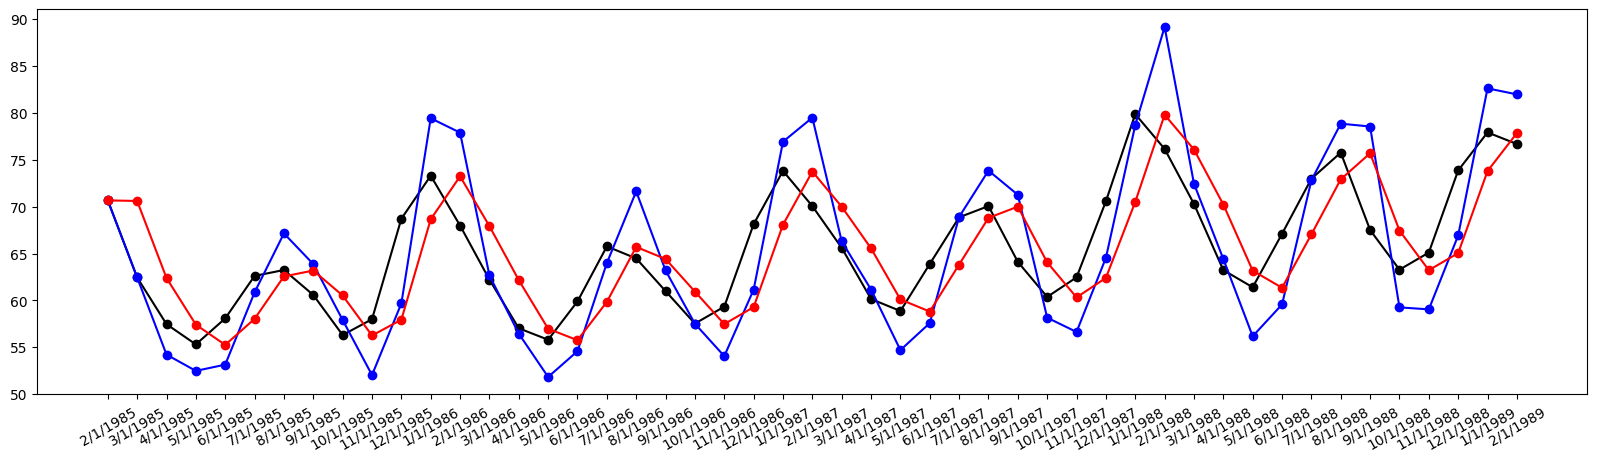

In [18]:
plt.plot(data,marker='o',color='black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')